### Exploratory Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
application_train = pd.read_csv('application_train_merged.csv', index_col=None, engine='python')

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,...,Unknown type of loan,0,1,2,3,4,5,C,X,Month_Balance_Count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,3.255682,2.045455,0.0,0.0,0.0,0.0,1.403409,1.295455,110.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [5]:
application_train.shape

(249507, 291)

In [4]:
application_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,...,Unknown type of loan,0,1,2,3,4,5,C,X,Month_Balance_Count
count,249507.000000,249507.000000,249507,249507,249507,249507,249507.000000,2.495070e+05,2.495070e+05,249507.000000,...,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000,249507.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,226728,166572,163048,175912,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278157.032632,0.078427,NaN,NaN,NaN,NaN,0.428978,1.698831e+05,5.983590e+05,27080.198897,...,0.001836,0.887965,0.025688,0.001805,0.000619,0.000409,0.003529,0.703275,0.409197,56.962731
std,102855.926986,0.268842,NaN,NaN,NaN,NaN,0.730309,2.528324e+05,3.943241e+05,14034.558186,...,0.047424,1.800453,0.128290,0.020692,0.009672,0.007383,0.069757,1.684929,1.140007,122.421845
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.610000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189039.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16681.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278094.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,5.185620e+05,25033.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367299.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34634.250000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.567366,0.099269,55.000000


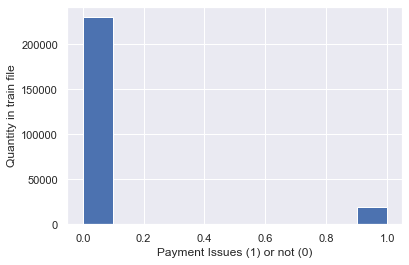

In [5]:
# Histogram of loan approvals vs denials 

plt.hist(application_train['TARGET'])
plt.xlabel('Payment Issues (1) or not (0)')
plt.ylabel('Quantity in train file')
plt.show()

In [6]:
print(application_train.TARGET.sum())
len(application_train)

19568


249507

### Looking at a couple of variables to check whether the data is reasonable

In [7]:
# Age variable
(application_train['DAYS_BIRTH'] / -365).describe()

count    249507.000000
mean         44.140548
std          11.782056
min          20.517808
25%          34.457534
50%          43.301370
75%          53.964384
max          69.043836
Name: DAYS_BIRTH, dtype: float64

### The age variable looks to be populated with no unreasonable outliers

In [8]:
(application_train['DAYS_EMPLOYED'] / -365).describe()

count    249507.000000
mean       -173.680496
std         386.325549
min       -1000.665753
25%           0.865753
50%           3.520548
75%           7.839726
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

### Something doesn't look right in the time employed variable with a negative 1000 years as the minimum variable. the max seems resonable. 

In [9]:
print(np.sum(application_train['DAYS_EMPLOYED'] > 0))
print(np.sum(application_train['DAYS_EMPLOYED'] > 0)/len(application_train['DAYS_EMPLOYED'])*100, 'percent of the train data set has negative length of employment')

44687
17.910118754183248 percent of the train data set has negative length of employment


In [10]:
# Filling negative employment as zero (these are marked as positive days)

mask = application_train.DAYS_EMPLOYED > 0
column_name = 'DAYS_EMPLOYED'
application_train.loc[mask, column_name] = 0

In [11]:
(application_train['DAYS_EMPLOYED'] / -365).describe()
# std of 6.4 years makes much more sense

count    249507.000000
mean          5.539929
std           6.427587
min          -0.000000
25%           0.865753
50%           3.520548
75%           7.839726
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

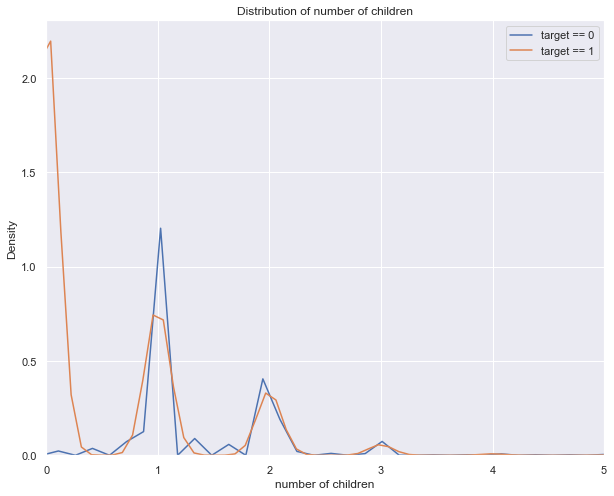

In [12]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'CNT_CHILDREN'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'CNT_CHILDREN'], label = 'target == 1')

plt.xlim(0, 5)

# Labeling of plot
plt.xlabel('number of children'); plt.ylabel('Density'); plt.title('Distribution of number of children');

Interesting to see that those who have had torubles repaying loans have mainly had zero children, although the distributions look to be similar for other children counts. Perhaps intriduce a flaged variable for no children?

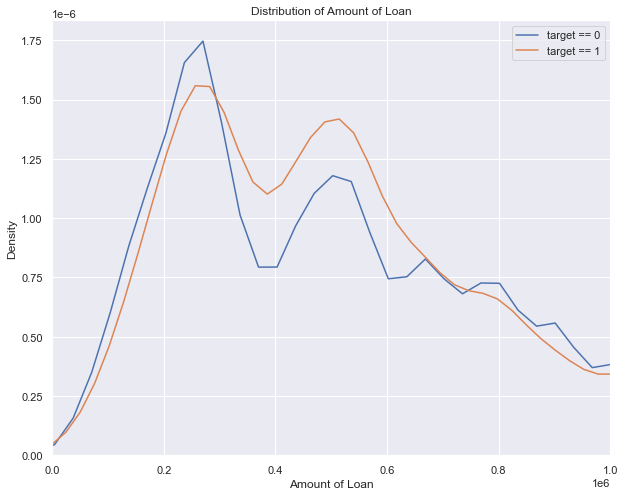

In [13]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

plt.xlim(0, 1000000)

# Labeling of plot
plt.xlabel('Amount of Loan'); plt.ylabel('Density'); plt.title('Distribution of Amount of Loan');


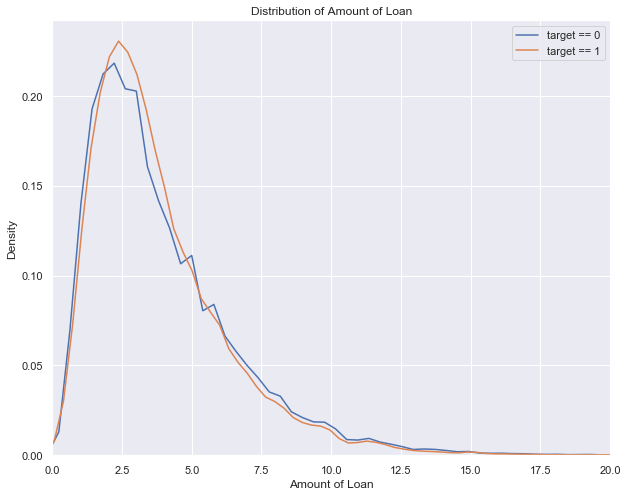

In [29]:
#New Variable for ration of loan to the income
#assumption here is that this ratio demonstrated the strain of the loan 
application_train['Loan_Income_Ratio'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'Loan_Income_Ratio'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'Loan_Income_Ratio'], label = 'target == 1')

plt.xlim(0, 20)

# Labeling of plot
plt.xlabel('Amount of Loan'); plt.ylabel('Density'); plt.title('Distribution of Loan Income Ratio');

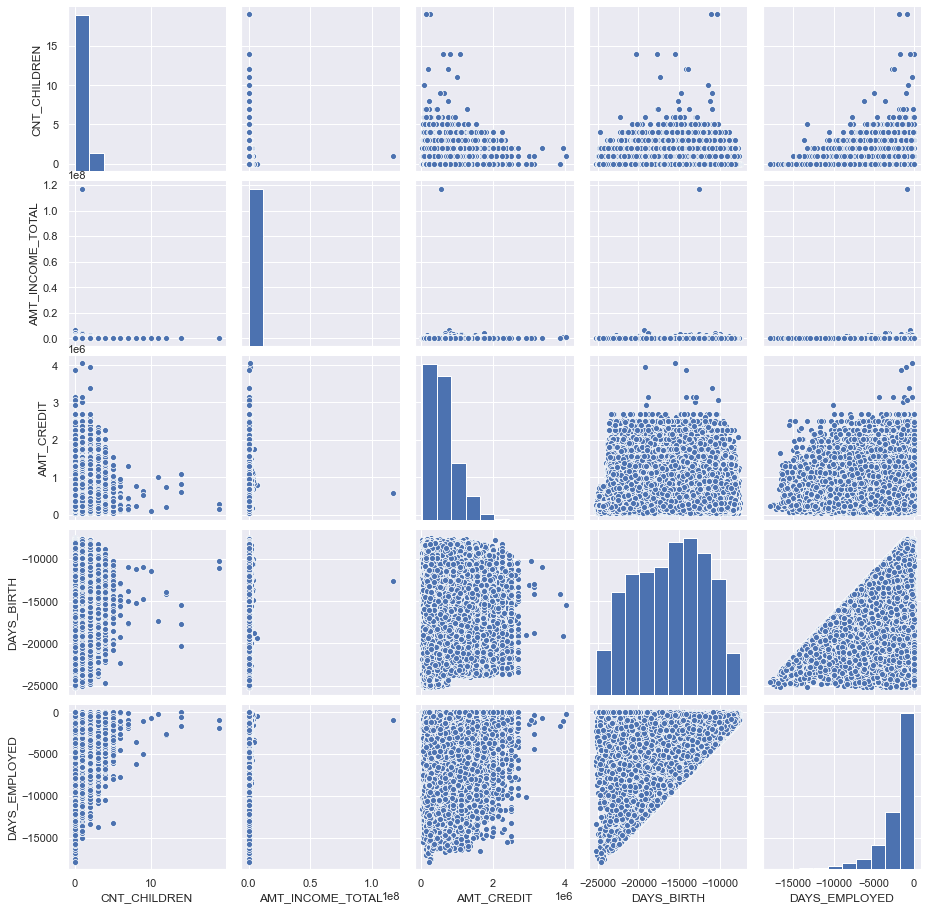

In [14]:
selected = application_train[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH',\
                            'DAYS_EMPLOYED', 'OCCUPATION_TYPE']]
sns.pairplot(selected)
plt.show()

count    2.495070e+05
mean     1.698831e+05
std      2.528324e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


(array([2.5140e+03, 4.7450e+03, 1.8150e+04, 2.3829e+04, 3.4719e+04,
        3.5051e+04, 2.6952e+04, 2.6927e+04, 3.3440e+03, 1.6566e+04,
        1.8350e+04, 6.2870e+03, 9.8600e+03, 3.5530e+03, 5.6320e+03,
        3.1200e+02, 1.8040e+03, 3.5650e+03, 1.0500e+03, 1.4880e+03,
        4.4600e+02, 2.0740e+03, 3.1000e+01, 9.6000e+01, 2.2900e+02,
        4.4000e+01, 6.0900e+02, 5.0000e+01, 1.6300e+02, 5.0000e+00,
        2.7000e+01, 8.4000e+01, 1.6000e+01, 4.5900e+02, 1.2000e+01,
        5.5000e+01, 2.0000e+00, 1.0000e+01, 3.5000e+01, 6.0000e+00,
        6.0000e+01, 4.0000e+00, 1.4000e+01, 2.0000e+00, 3.0000e+00,
        1.0800e+02, 0.0000e+00, 8.0000e+00, 1.0000e+00, 8.0000e+00]),
 array([ 26100.,  45378.,  64656.,  83934., 103212., 122490., 141768.,
        161046., 180324., 199602., 218880., 238158., 257436., 276714.,
        295992., 315270., 334548., 353826., 373104., 392382., 411660.,
        430938., 450216., 469494., 488772., 508050., 527328., 546606.,
        565884., 585162., 604440.,

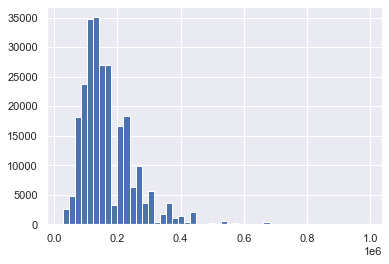

In [15]:
# Income seems to have some outliers - checking:
print (application_train['AMT_INCOME_TOTAL'].describe())

# Does a mean of $169,000 make sense for individual income?
new_income = np.array(application_train['AMT_INCOME_TOTAL'].tolist())
new_income = new_income[np.logical_and(new_income<1000000, new_income>0)]
plt.hist(new_income, bins = 50)

In [16]:
# Removing strong outlier in income
three_stds = np.mean(application_train['AMT_INCOME_TOTAL']) + 3*np.std(application_train['AMT_INCOME_TOTAL'])
application_train = application_train[application_train.AMT_INCOME_TOTAL < three_stds]

In [17]:
# Income seems to have some outliers - checking:
print (application_train['AMT_INCOME_TOTAL'].describe())

# note: would we want to cut it down even further or bin this variable?

count    249342.000000
mean     168538.888960
std       87676.732369
min       26100.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      909000.000000
Name: AMT_INCOME_TOTAL, dtype: float64


In [18]:
application_train.shape

(249342, 291)

In [19]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,...,Unknown type of loan,0,1,2,3,4,5,C,X,Month_Balance_Count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,3.255682,2.045455,0.0,0.0,0.0,0.0,1.403409,1.295455,110.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [20]:
# Finding categorical variables
cols = application_train.columns

num_cols = application_train._get_numeric_data().columns

list(set(cols) - set(num_cols))

['NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY']

In [21]:
# Transforming categorical variable into Dummies

application_train = application_train.join(pd.get_dummies(application_train.NAME_HOUSING_TYPE))\
.drop("NAME_HOUSING_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_FAMILY_STATUS))\
.drop("NAME_FAMILY_STATUS", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.WEEKDAY_APPR_PROCESS_START))\
.drop("WEEKDAY_APPR_PROCESS_START", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.FLAG_OWN_REALTY))\
.drop("FLAG_OWN_REALTY", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.OCCUPATION_TYPE))\
.drop("OCCUPATION_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_TYPE_SUITE))\
.drop("NAME_TYPE_SUITE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.CODE_GENDER))\
.drop("CODE_GENDER", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_INCOME_TYPE), lsuffix='_x')\
.drop("NAME_INCOME_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_EDUCATION_TYPE))\
.drop("NAME_EDUCATION_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.ORGANIZATION_TYPE), lsuffix='_x')\
.drop("ORGANIZATION_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.NAME_CONTRACT_TYPE))\
.drop("NAME_CONTRACT_TYPE", axis=1)
application_train = application_train.join(pd.get_dummies(application_train.FLAG_OWN_CAR), lsuffix='_x')\
.drop("FLAG_OWN_CAR", axis=1)

application_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA,Cash loans,Revolving loans,N,Y
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,1,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,1,0,1
3,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,1,0,1,0
4,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,1,0,1,0


In [22]:
pd.options.display.max_columns = None
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x_1,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_x_2,AMT_APPLICATION_x,AMT_CREDIT_x,AMT_DOWN_PAYMENT_x,AMT_GOODS_PRICE_x,HOUR_APPR_PROCESS_START_x,NFLAG_LAST_APPL_IN_DAY_x,RATE_DOWN_PAYMENT_x,RATE_INTEREST_PRIMARY_x,RATE_INTEREST_PRIVILEGED_x,DAYS_DECISION_x,SELLERPLACE_AREA_x,CNT_PAYMENT_x,DAYS_FIRST_DRAWING_x,DAYS_FIRST_DUE_x,DAYS_LAST_DUE_1ST_VERSION_x,DAYS_LAST_DUE_x,DAYS_TERMINATION_x,NFLAG_INSURED_ON_APPROVAL_x,Cash loans_x,Consumer loans_x,Revolving loans_x,XNA_x,FRIDAY_x,MONDAY_x,SATURDAY_x,SUNDAY_x,THURSDAY_x,TUESDAY_x,WEDNESDAY_x,Auto technology_x,Clothing_x,Connectivity_x,Construction_x,Consumer electronics_x,Furniture_x,Industry_x,Jewelry_x,MLM partners_x,Tourism_x,XNASeller_Ind_x,XNA_Name_Group_x,high_x,low_action_x,low_normal_x,middle_x,Card Street_x,Card X-Sell_x,Cash_x,Cash Street: high_x,Cash Street: low_x,Cash Street: middle_x,Cash X-Sell: high_x,Cash X-Sell: low_x,Cash X-Sell: middle_x,POS household with interest_x,POS household without interest_x,POS industry with interest_x,POS industry without interest_x,POS mobile with interest_x,POS mobile without interest_x,POS other with interest_x,POS others without interest_x,N_x,Y_x,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,late,AMT_ANNUITY_y_1,AMT_APPLICATION_y,AMT_CREDIT_y,AMT_DOWN_PAYMENT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY_y,RATE_DOWN_PAYMENT_y,RATE_INTEREST_PRIMARY_y,RATE_INTEREST_PRIVILEGED_y,DAYS_DECISION_y,SELLERPLACE_AREA_y,CNT_PAYMENT_y,DAYS_FIRST_DRAWING_y,DAYS_FIRST_DUE_y,DAYS_LAST_DUE_1ST_VERSION_y,DAYS_LAST_DUE_y,DAYS_TERMINATION_y,NFLAG_INSURED_ON_APPROVAL_y,Cash loans_y,Consumer loans_y,Revolving loans_y,XNA_y,FRIDAY_y,MONDAY_y,SATURDAY_y,SUNDAY_y,THURSDAY_y,TUESDAY_y,WEDNESDAY_y,Auto technology_y,Clothing_y,Connectivity_y,Construction_y,Consumer electronics_y,Furniture_y,Industry_y,Jewelry_y,MLM partners_y,Tourism_y,XNASeller_Ind_y,XNA_Name_Group_y,high_y,low_action_y,low_normal_y,middle_y,Card Street_y,Card X-Sell_y,Cash_y,Cash Street: high_y,Cash Street: low_y,Cash Street: middle_y,Cash X-Sell: high_y,Cash X-Sell: low_y,Cash X-Sell: middle_y,POS household with interest_y,POS household without interest_y,POS industry with interest_y,POS industry without interest_y,POS mobile with interest_y,POS mobile without interest_y,POS other with interest_y,POS others without interest_y,N_y,Y_y,Active_x,Amortized debt,Approved_x,Canceled,Completed_x,Demand_x,Returned to the store,Signed_x,XNA_Name_Status,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CU

In [24]:
# Dropping a few duplicate columns
application_train = application_train.loc[:,~application_train.columns.duplicated()]
application_train.shape

(249342, 398)